Class Distribution in Original Data:
1    357
0    212
Name: count, dtype: int64

Class Distribution in Training Set (After Normalization):
1    286
0    169
Name: count, dtype: int64

Class Distribution in Testing Set (After Normalization):
1    71
0    43
Name: count, dtype: int64


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

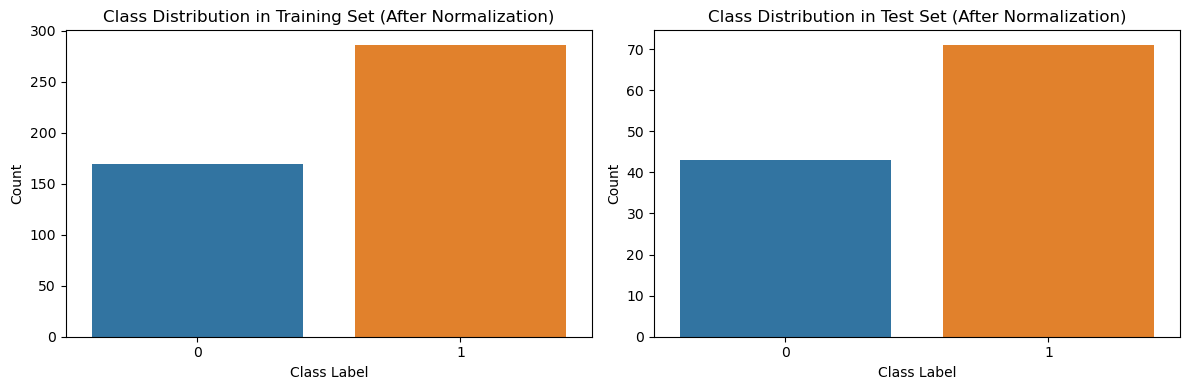

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, confusion_matrix, accuracy_score, adjusted_mutual_info_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
from sklearn.decomposition import FastICA
from sklearn.tree import DecisionTreeClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Print class distribution before normalization
print("Class Distribution in Original Data:")
print(pd.Series(y).value_counts())

# Handling missing NaN values (replacing with mean)
X = np.nan_to_num(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing the data between 0 and 1
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Print class distribution after normalization
print("\nClass Distribution in Training Set (After Normalization):")
print(pd.Series(y_train).value_counts())

print("\nClass Distribution in Testing Set (After Normalization):")
print(pd.Series(y_test).value_counts())

# 4. Visualize class distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set (After Normalization)")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set (After Normalization)")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

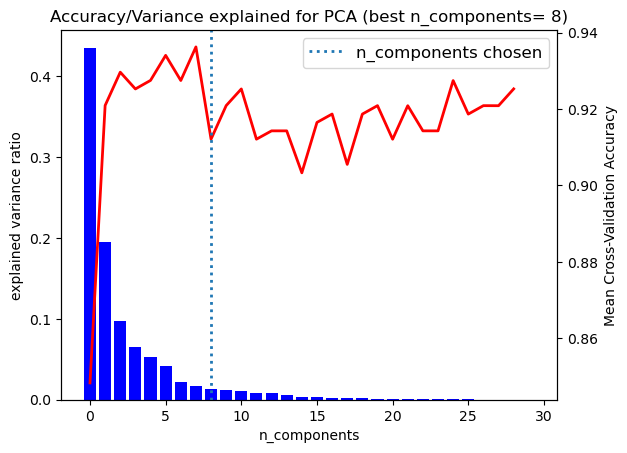

Calculating Reconstruction Error


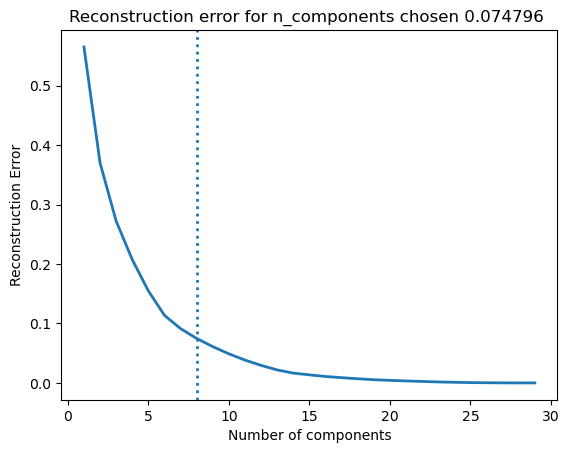

In [2]:
#PCA
#Dimensionality reduction

decisiontree = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=5)
pca = PCA()

pipe = Pipeline(steps=[('pca', pca), ('decisionTree', decisiontree)])

# Fit the PCA on the training data
pca.fit(X_train)

fig, ax = plt.subplots()
ax.bar(np.arange(X_train.shape[1]), pca.explained_variance_ratio_, linewidth=2, color='blue')
plt.axis('tight')
plt.xlabel('n_components')
ax.set_ylabel('explained variance ratio')

# Checking the accuracy for taking all combination of components
n_components = range(1, X_train.shape[1])
gridSearch = GridSearchCV(pipe, dict(pca__n_components=n_components), cv=3)
gridSearch.fit(X_train, y_train)  # Make sure to use only the training set
results = gridSearch.cv_results_
ax1 = ax.twinx()

# Plotting the accuracies and best component
ax1.plot(results['mean_test_score'], linewidth=2, color='red')
ax1.set_ylabel('Mean Cross-Validation Accuracy')
ax1.axvline(gridSearch.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen', linewidth=2)

plt.legend(prop=dict(size=12))
plt.title('Accuracy/Variance explained for PCA (best n_components= %d)' % gridSearch.best_estimator_.named_steps['pca'].n_components)
plt.show()

# Reducing the dimensions with optimal number of components
pca_new = PCA(n_components=gridSearch.best_estimator_.named_steps['pca'].n_components)
pca_new.fit(X_train)  # Again, fit on the training data only
X_train_transformed = pca_new.transform(X_train)
# No need to transform the test set here since we're not using it

# Reconstruction Error

print("Calculating Reconstruction Error")

reconstruction_error = []
for comp in n_components:
    pca = PCA(n_components=comp)
    X_transformed = pca.fit_transform(X_train)  # Fit and transform the training data
    X_projected = pca.inverse_transform(X_transformed)
    reconstruction_error.append(((X_train - X_projected) ** 2).mean())

    if comp == gridSearch.best_estimator_.named_steps['pca'].n_components:
        chosen_error = ((X_train - X_projected) ** 2).mean()

fig2, ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth=2)
ax2.axvline(gridSearch.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for n_components chosen %f ' % chosen_error)
plt.show()

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

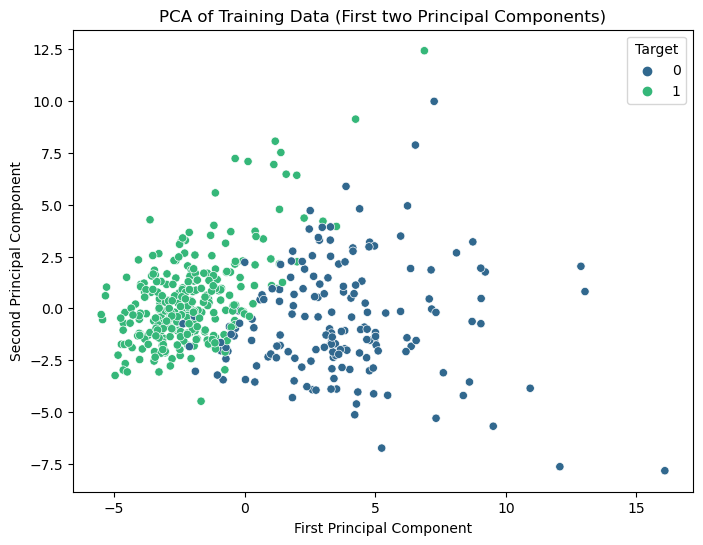

In [3]:
# Let's reduce the training data to the first two principal components for visualization
pca_for_visualization = PCA(n_components=2)
X_train_pca_visualization = pca_for_visualization.fit_transform(X_train)

# Now we create a DataFrame with the first two components
df_pca = pd.DataFrame(X_train_pca_visualization, columns=['First Principal Component', 'Second Principal Component'])

# Add the target variable for coloring the data points
df_pca['target'] = y_train

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, 
                x='First Principal Component', 
                y='Second Principal Component', 
                hue='target',
                palette='viridis')

plt.title('PCA of Training Data (First two Principal Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
# Move the legend out of the plot
plt.legend(title='Target', bbox_to_anchor=(1, 1))
plt.show()

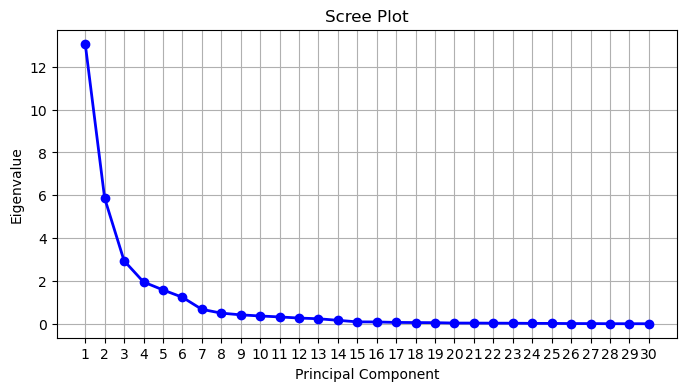

In [4]:
# Fit PCA on the training data
pca = PCA().fit(X_train)

# Eigenvalues (explained_variance_) vs. Principal Components Plot (Scree Plot)
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(1, len(pca.explained_variance_) + 1))
plt.grid(True)
plt.show()

In [5]:
from sklearn.model_selection import cross_val_score

# Using Decision Tree Classifier with the specified parameters
decision_tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=5)

# Perform cross-validation
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print(f"Decision Tree cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores)}")

Decision Tree cross-validation scores: [0.9010989  0.86813187 0.96703297 0.9010989  0.91208791]
Mean CV accuracy: 0.9098901098901099


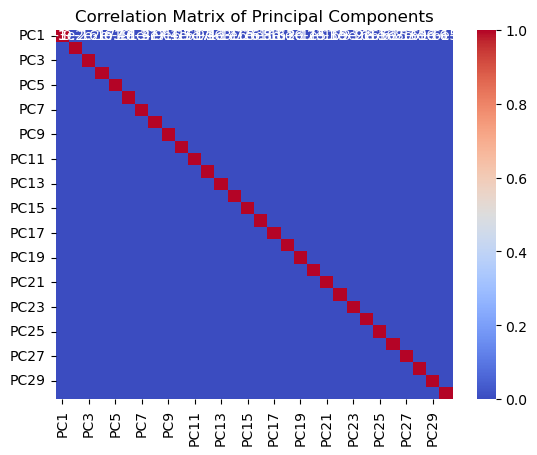

In [6]:
# Fit PCA on the training data
pca = PCA().fit(X_train)
X_train_pca = pca.transform(X_train)

# Create DataFrame with the PCA features
pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(1, len(pca.explained_variance_) + 1)])

# Calculate the correlation matrix
corr_matrix = pca_df.corr()

# Plotting the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Principal Components')
plt.show()

In [7]:
# Print the explained variance for each component
for i, exp_var in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {exp_var:.4f}")

Principal Component 1: 0.4350
Principal Component 2: 0.1950
Principal Component 3: 0.0978
Principal Component 4: 0.0649
Principal Component 5: 0.0525
Principal Component 6: 0.0411
Principal Component 7: 0.0224
Principal Component 8: 0.0165
Principal Component 9: 0.0138
Principal Component 10: 0.0121
Principal Component 11: 0.0106
Principal Component 12: 0.0088
Principal Component 13: 0.0077
Principal Component 14: 0.0053
Principal Component 15: 0.0029
Principal Component 16: 0.0027
Principal Component 17: 0.0020
Principal Component 18: 0.0018
Principal Component 19: 0.0016
Principal Component 20: 0.0010
Principal Component 21: 0.0010
Principal Component 22: 0.0009
Principal Component 23: 0.0008
Principal Component 24: 0.0006
Principal Component 25: 0.0005
Principal Component 26: 0.0003
Principal Component 27: 0.0002
Principal Component 28: 0.0001
Principal Component 29: 0.0000
Principal Component 30: 0.0000


In [8]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print cumulative explained variance
for i, cum_var in enumerate(cumulative_explained_variance):
    print(f"Cumulative Explained Variance up to component {i+1}: {cum_var:.4f}")


Cumulative Explained Variance up to component 1: 0.4350
Cumulative Explained Variance up to component 2: 0.6300
Cumulative Explained Variance up to component 3: 0.7278
Cumulative Explained Variance up to component 4: 0.7927
Cumulative Explained Variance up to component 5: 0.8452
Cumulative Explained Variance up to component 6: 0.8864
Cumulative Explained Variance up to component 7: 0.9087
Cumulative Explained Variance up to component 8: 0.9252
Cumulative Explained Variance up to component 9: 0.9390
Cumulative Explained Variance up to component 10: 0.9511
Cumulative Explained Variance up to component 11: 0.9616
Cumulative Explained Variance up to component 12: 0.9705
Cumulative Explained Variance up to component 13: 0.9782
Cumulative Explained Variance up to component 14: 0.9835
Cumulative Explained Variance up to component 15: 0.9864
Cumulative Explained Variance up to component 16: 0.9891
Cumulative Explained Variance up to component 17: 0.9912
Cumulative Explained Variance up to comp

In [9]:
# Find number of components that explain at least 95% of variance
num_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components that explain at least 95% of variance: {num_components_95}")


Number of components that explain at least 95% of variance: 10


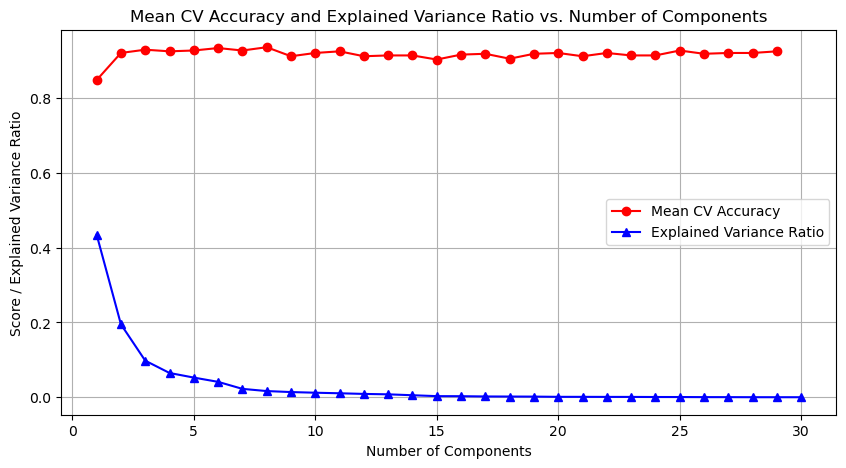

In [10]:
# Plotting Mean Cross-Validation Accuracy and Explained Variance Ratio vs Number of Components
plt.figure(figsize=(10, 5))

# Mean Cross-Validation Accuracy
plt.plot(n_components, results['mean_test_score'], label='Mean CV Accuracy', color='red', marker='o')

# Explained Variance Ratio
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_ratio_, label='Explained Variance Ratio', color='blue', marker='^')

plt.xlabel('Number of Components')
plt.ylabel('Score / Explained Variance Ratio')
plt.title('Mean CV Accuracy and Explained Variance Ratio vs. Number of Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [11]:
#EM clustering

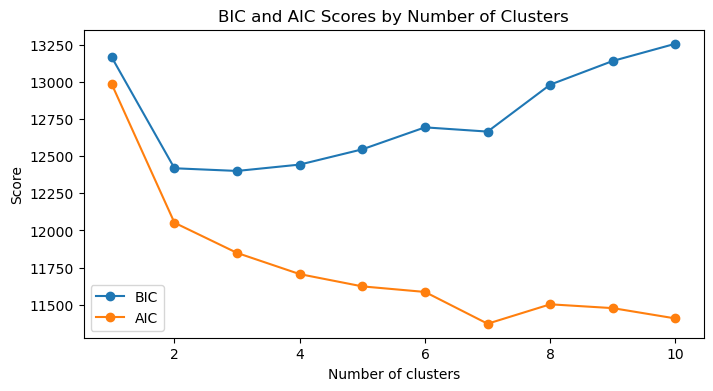

Optimal number of clusters according to BIC: 3


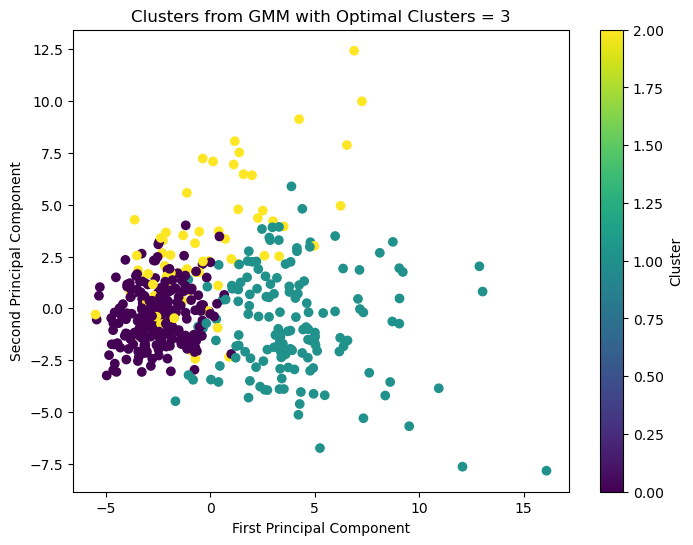

In [12]:
from sklearn.mixture import GaussianMixture

# Number of clusters to try
n_clusters = np.arange(1, 11)
bics = []
aics = []

# Loop over each possible number of clusters and fit a GMM
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X_train_transformed) # Use the PCA transformed data
    bics.append(gmm.bic(X_train_transformed))
    aics.append(gmm.aic(X_train_transformed))

# Plot the BIC and AIC scores
plt.figure(figsize=(8, 4))
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.legend(loc='best')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('BIC and AIC Scores by Number of Clusters')
plt.show()

# Identify the number of clusters that has the lowest BIC
optimal_clusters_bic = n_clusters[np.argmin(bics)]
print(f"Optimal number of clusters according to BIC: {optimal_clusters_bic}")

# Fit the GMM with the optimal number of clusters
gmm_final = GaussianMixture(n_components=optimal_clusters_bic, random_state=42).fit(X_train_transformed)

# Predict the cluster for each instance
clusters = gmm_final.predict(X_train_transformed)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title(f'Clusters from GMM with Optimal Clusters = {optimal_clusters_bic}')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()

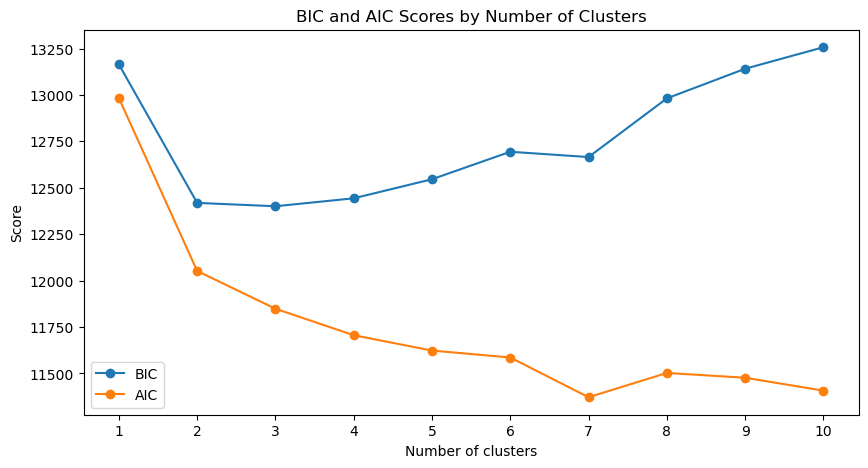

Optimal number of clusters according to BIC: 3
Optimal number of clusters according to AIC: 7


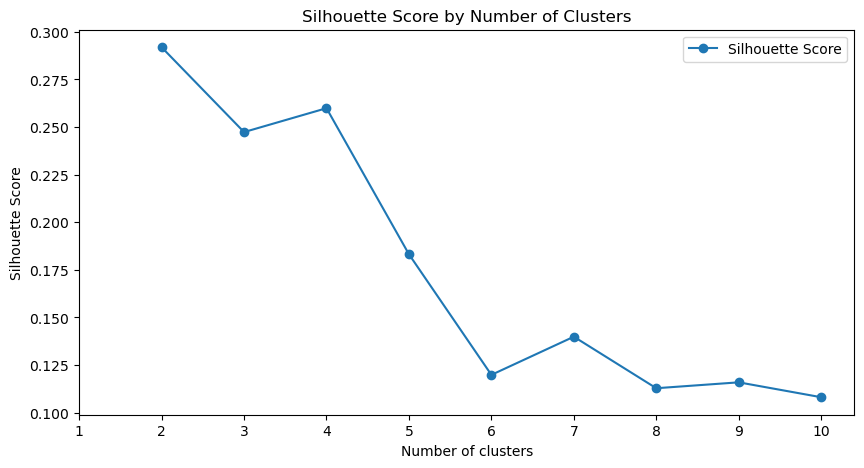

Optimal number of clusters according to Silhouette Score: 2
Best Silhouette Score: 0.29194736958463724


In [15]:
from sklearn.metrics import silhouette_score

# Reset the BIC and AIC scores
bics = []
aics = []
best_bic = np.inf
best_aic = np.inf
optimal_clusters_bic = 0
optimal_clusters_aic = 0

# Variables to store the best scores and corresponding number of clusters
best_silhouette = -1
optimal_clusters_silhouette = 0
silhouette_scores = []

# Loop over each possible number of clusters and fit a GMM
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X_train_transformed)
    labels = gmm.predict(X_train_transformed)
    
    # Calculate BIC and AIC
    current_bic = gmm.bic(X_train_transformed)
    current_aic = gmm.aic(X_train_transformed)
    bics.append(current_bic)
    aics.append(current_aic)
    
    # Calculate Silhouette score only if there are 2 or more clusters
    if n > 1:
        current_silhouette = silhouette_score(X_train_transformed, labels)
        silhouette_scores.append(current_silhouette)
        # Check if this score is better than the current best for silhouette
        if current_silhouette > best_silhouette:
            best_silhouette = current_silhouette
            optimal_clusters_silhouette = n
    else:
        # Append None for the case of 1 cluster, where silhouette score is not defined
        silhouette_scores.append(None)

    # Check if this score is better than the current best for BIC
    if current_bic < best_bic:
        best_bic = current_bic
        optimal_clusters_bic = n
        
    # Check if this score is better than the current best for AIC
    if current_aic < best_aic:
        best_aic = current_aic
        optimal_clusters_aic = n

# The rest of the code can follow...


# Plot the BIC and AIC scores
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.xticks(n_clusters)
plt.legend(loc='best')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('BIC and AIC Scores by Number of Clusters')
plt.show()

print(f"Optimal number of clusters according to BIC: {optimal_clusters_bic}")
print(f"Optimal number of clusters according to AIC: {optimal_clusters_aic}")

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(n_clusters[1:], silhouette_scores[1:], label='Silhouette Score', marker='o')
plt.xticks(n_clusters)
plt.legend(loc='best')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.show()

print(f"Optimal number of clusters according to Silhouette Score: {optimal_clusters_silhouette}")
print(f"Best Silhouette Score: {best_silhouette}")

In [16]:
#K-Means

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

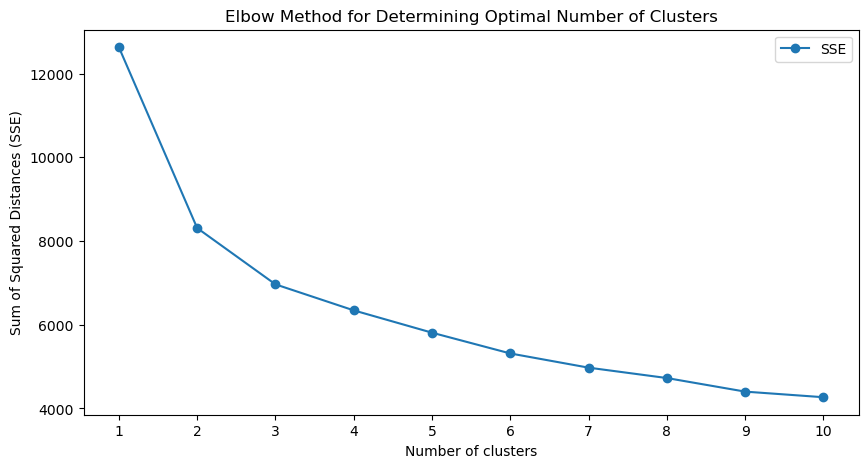

Elbow point suggesting optimal number of clusters: 1


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


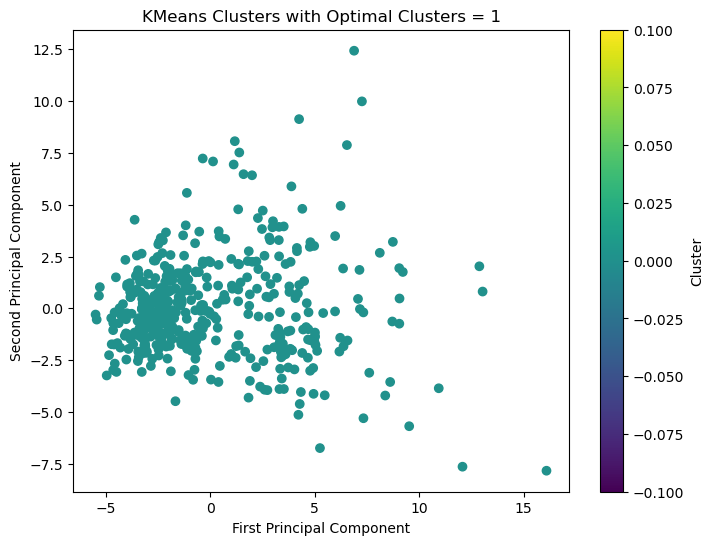

In [17]:
from sklearn.cluster import KMeans

# Variables to store SSE for each number of clusters
sse = []

# Loop over each possible number of clusters and fit a KMeans
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_train_transformed)
    # The inertia attribute gives the sum of squared distances of samples to their closest cluster center
    sse.append(kmeans.inertia_)

# Plot the SSE scores
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, sse, label='SSE', marker='o')
plt.xticks(n_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.legend()
plt.show()

# Determine the elbow point in the SSE plot, which is where the decrease in SSE slows down significantly
# This can be done visually or with more sophisticated methods like the Kneedle algorithm
elbow_point = np.argmin(np.gradient(np.log(sse)))  # Example of a simple elbow point detection
print(f"Elbow point suggesting optimal number of clusters: {n_clusters[elbow_point]}")

# Fit the KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=n_clusters[elbow_point], random_state=42)
kmeans_optimal.fit(X_train_transformed)

# Predict the cluster for each instance
clusters_kmeans = kmeans_optimal.predict(X_train_transformed)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=clusters_kmeans, cmap='viridis', marker='o')
plt.title(f'KMeans Clusters with Optimal Clusters = {n_clusters[elbow_point]}')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.show()

/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

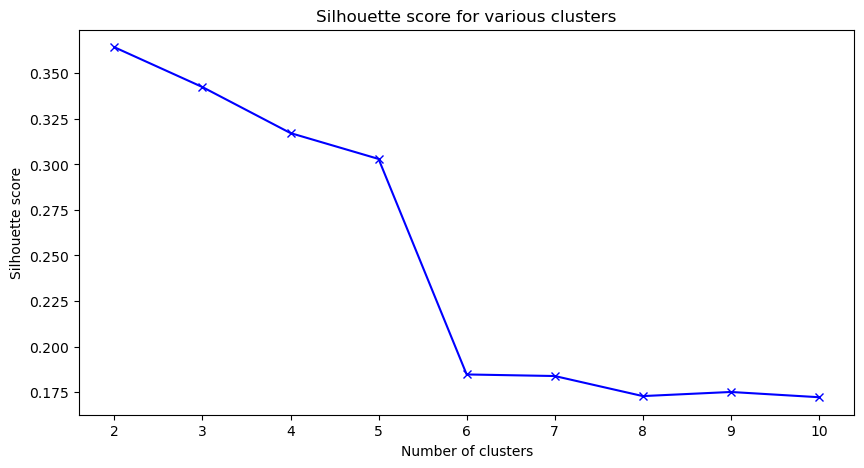

The optimal number of clusters is 2 with a silhouette score of 0.36435287990840953.


In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming X_train_transformed is the PCA-transformed data

range_n_clusters = np.arange(2, 11)  # Silhouette analysis requires at least 2 clusters
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Fit the KMeans clustering for the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_transformed)
    
    # Calculate the silhouette score
    silhouette_avg.append(silhouette_score(X_train_transformed, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for various clusters')
plt.xticks(range_n_clusters)
plt.show()

# Find the number of clusters that gives the maximum silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_avg)]
print(f"The optimal number of clusters is {optimal_n_clusters} with a silhouette score of {max(silhouette_avg)}.")

In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming you have already computed `X_train_transformed` and have run KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_train_transformed)

# Silhouette Score
silhouette_avg = silhouette_score(X_train_transformed, clusters_kmeans)
print(f"Silhouette Score for n_clusters = 2: {silhouette_avg:.3f}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_train_transformed, clusters_kmeans)
print(f"Calinski-Harabasz Index for n_clusters = 2: {calinski_harabasz:.3f}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_train_transformed, clusters_kmeans)
print(f"Davies-Bouldin Index for n_clusters = 2: {davies_bouldin:.3f}")


Silhouette Score for n_clusters = 2: 0.364
Calinski-Harabasz Index for n_clusters = 2: 235.549
Davies-Bouldin Index for n_clusters = 2: 1.252


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
